# Sea Level Predictor

This project analyzes global sea level data from 1880 to 2013 and uses linear regression to model and predict future sea level rise. Two regression lines are generated:
- One based on the full historical dataset (1880–2013)
- One starting from the year 2000 to reflect recent trends

The model extrapolates both lines forward to 2050 and visualizes them alongside the original data using `matplotlib`. Linear regression is performed with `scipy.stats.linregress`.

Developed as part of the **freeCodeCamp Data Analysis with Python** certification.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [15]:
def draw_plot():

# Use Pandas to import the data from epa-sea-level.csv.
    
    df = pd.read_csv('epa-sea-level.csv')

# The x label should be Year, the y label should be Sea Level (inches), and the title should be Rise in Sea Level.

# Use matplotlib to create a scatter plot using the Year column as the x-axis and the CSIRO Adjusted Sea Level column as the y-axis.
    
    plt.figure(figsize=(20, 8), dpi=100)    
    plt.scatter(x=df['Year'], y=df['CSIRO Adjusted Sea Level'], marker='.', color = 'navy')
    plt.xlabel('Year')
    plt.ylabel('Sea Level (inches)')
    plt.title('Rise in Sea Level')

# Use the linregress function from scipy.stats to get the slope and y-intercept of the line of best fit.
    # Plot the line of best fit over the top of the scatter plot.
    # Make the line go through the year 2050 to predict the sea level rise in 2050.

    res1 = linregress(x=df['Year'], y=df['CSIRO Adjusted Sea Level'])
    y_pred = res1.intercept + res1.slope * df['Year']

    x_1 = list(range(2013, 2051))
    y_1 = []
    for year in x_1:
        y_1.append(res1.intercept + res1.slope*year)

    extended_x = pd.concat([df['Year'], pd.DataFrame(x_1)])
    extended_x = extended_x.set_index(np.arange(len(extended_x)))
    extended_x.rename(columns={extended_x.columns[0]: "Years extended"}, inplace='True')

    extended_y = pd.concat([y_pred, pd.DataFrame(y_1)])
    extended_y = extended_y.set_index(np.arange(len(extended_y)))
    extended_y.rename(columns={extended_y.columns[0]: "predicted value"}, inplace='True')

    plt.plot(extended_x, extended_y, color='red', label='Line of best fit for whole data set')

# Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset.
        # Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.


    i = df.loc[df['Year']==2000].index[0]

    res2 = linregress(x=df['Year'][i:], y=df['CSIRO Adjusted Sea Level'][i:])
    y_pred2 = res2.intercept + res2.slope * df['Year'][i:]

    x_2 = list(range(2013, 2051))
    y_2 = []
    for year in x_2:
        y_2.append(res2.intercept + res2.slope*year)

    extended_x2 = pd.concat([df['Year'][i:], pd.DataFrame(x_2)])
    extended_x2 = extended_x2.set_index(np.arange(len(extended_x2)))
    extended_x2.rename(columns={extended_x2.columns[0]: "Years extended"}, inplace='True')

    extended_y2 = pd.concat([y_pred2, pd.DataFrame(y_2)])
    extended_y2 = extended_y2.set_index(np.arange(len(extended_y2)))
    extended_y2.rename(columns={extended_y2.columns[0]: "predicted value"}, inplace='True')

    plt.plot(extended_x2, extended_y2, color='green', label='Line of best fit for dataset 1999<')

    # Save plot and return data for testing
    
    plt.savefig('sea_level_plot.png')
    return plt.gca()

<Axes: title={'center': 'Rise in Sea Level'}, xlabel='Year', ylabel='Sea Level (inches)'>

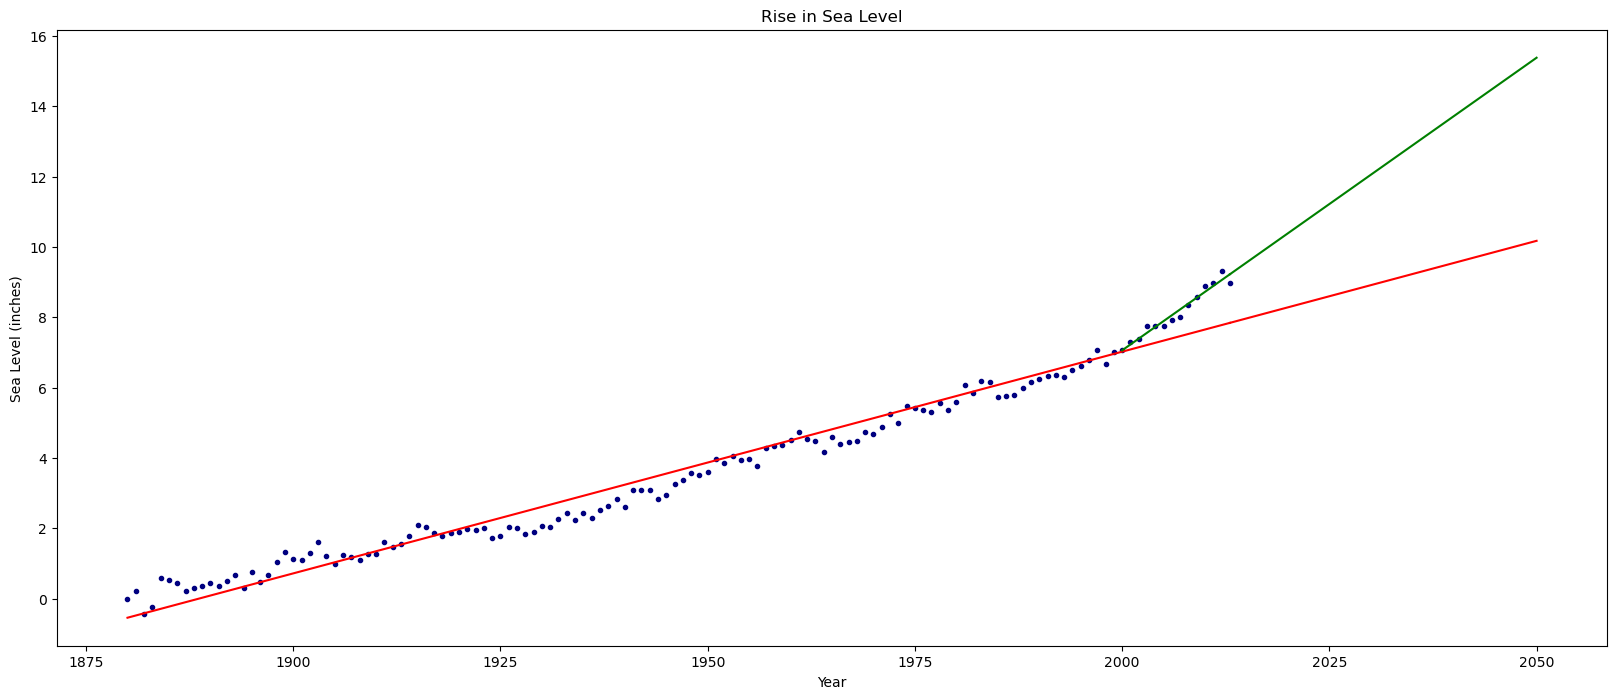

In [16]:
draw_plot()